In [121]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [122]:
df = pd.read_csv("C:\\Users\\sumit\\Desktop\\LLM\\Deep Learning\\Home Loan Data Analysis\\loan_data.csv")
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df.tail(6)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [124]:
df.shape

(307511, 122)

In [125]:
print("Columns (first 20):", list(df.columns)[:20])

Columns (first 20): ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [127]:
# 2) CHECK FOR NULL VALUES
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [128]:
# 3) PERCENTAGE OF DEFAULTS (TARGET COLUMN ASSUMED 'TARGET')
target_col = 'TARGET'  # Change if actual target col has different name
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset!")

In [129]:
default_rate = df[target_col].mean() * 100
print(f"\nPercentage of default in dataset: {default_rate:.2f}%")


Percentage of default in dataset: 8.07%


In [130]:
# 4) BALANCE THE DATASET IF IMBALANCED
# Check balance
counts = df[target_col].value_counts()
print("\nClass distribution before balancing:")
print(counts)


Class distribution before balancing:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [131]:
# Simple balancing via undersampling
if abs(counts[0] - counts[1]) > 0:
    minority_class = counts.idxmin()
    majority_class = counts.idxmax()
    df_min = df[df[target_col] == minority_class]
    df_maj = df[df[target_col] == majority_class].sample(len(df_min), random_state=42)
    df_balanced = pd.concat([df_min, df_maj], axis=0).sample(frac=1, random_state=42)
else:
    df_balanced = df.copy()

print("\nClass distribution after balancing:")
print(df_balanced[target_col].value_counts())


Class distribution after balancing:
TARGET
1    24825
0    24825
Name: count, dtype: int64


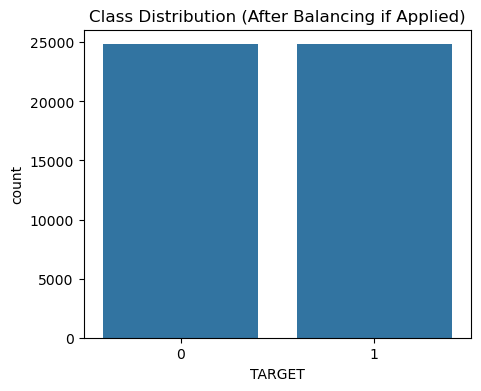

In [132]:
# 5) PLOT BALANCED OR IMBALANCED DATA
plt.figure(figsize=(5,4))
sns.countplot(data=df_balanced, x=target_col)
plt.title("Class Distribution (After Balancing if Applied)")
plt.show()

In [133]:
# 6) ENCODE CATEGORICAL COLUMNS
# Identify categorical columns
categorical_cols = df_balanced.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_balanced[col] = le.fit_transform(df_balanced[col].astype(str))
    label_encoders[col] = le

In [134]:
X = df_balanced.drop(columns=[target_col])
y = df_balanced[target_col]

In [135]:
# Handle missing values by imputing with median (good for numeric data)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [136]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [137]:
# Then split train further into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [138]:
# Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [140]:
# Sensitivity (Recall for positive/default class)
sensitivity = tp / (tp + fn)
print(f"\nSensitivity (Recall for default class): {sensitivity:.4f}")


Sensitivity (Recall for default class): 0.5811


ROC-AUC: 0.6187


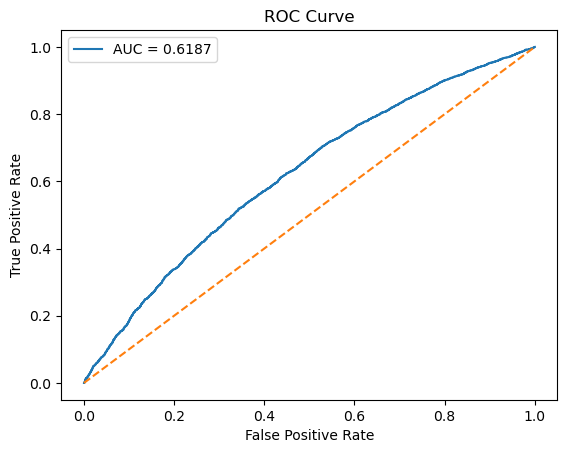

In [141]:
# 8) CALCULATE ROC-AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Method 1 – Simple ANN (Sequential, Dense layers)

In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [143]:
# Determine input dimension
input_dim = X_train.shape[1]
print("Input dimension:", input_dim)

Input dimension: 121


In [144]:
# Build the Keras Sequential model
model1 = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')   # Binary classification
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [146]:
# Display model summary
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,921 (38.75 KB)

 Trainable params: 9,921 (38.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5220 - loss: 1144.0574 - val_accuracy: 0.5373 - val_loss: 246.5608
Epoch 2/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5227 - loss: 540.5812 - val_accuracy: 0.5011 - val_loss: 696.2925
Epoch 3/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5176 - loss: 430.2303 - val_accuracy: 0.5191 - val_loss: 914.8413
Epoch 4/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5229 - loss: 378.1538 - val_accuracy: 0.5438 - val_loss: 146.7074
Epoch 5/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5226 - loss: 358.6585 - val_accuracy: 0.5608 - val_loss: 147.8316
Epoch 6/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5314 - loss: 252.9716 - val_accuracy: 0.5042 - val_loss: 347.4602
Epoch 7/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5213 - loss: 233.4525 - val_accuracy: 0.5344 - val_loss: 144.2536
Epoch 8/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5239 - lo

In [ ]:
# Predict probabilities on the processed test data
y_pred_proba1 = model1.predict(X_test)

In [ ]:
# --- Evaluate the Model ---
# Predict probabilities on the processed test data
y_pred_proba = model1.predict(X_test)
# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

In [ ]:
# ============================
# Plotting Accuracy and Loss
# ============================

In [ ]:
plt.figure(figsize=(12,5))

In [ ]:
# Accuracy
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Loss
plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Method 2 – ANN with Dropout, BatchNorm, EarlyStopping

In [ ]:
# ============================
# Method 2: ANN with Dropout, BatchNorm, EarlyStopping
# ============================

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Build model using model.add()
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

In [ ]:
# Summary
model2.summary()

In [ ]:
# Train model
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, lr_scheduler, checkpoint],
    class_weight=class_weights,
    verbose=1
)

In [ ]:
# Predict probabilities
y_pred_proba2 = model2.predict(X_test)

In [ ]:
# --- Evaluate the Model ---
# Predict probabilities on the processed test data
y_pred_proba = model2.predict(X_test)
# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

In [ ]:
# ============================
# Plotting Accuracy and Loss
# ============================
plt.figure(figsize=(12,5))


In [ ]:
# Accuracy
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Method 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
# Loss
plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Method 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()